C:\Users\realr\AppData\Local\Temp\ipykernel_2004\3315303975.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


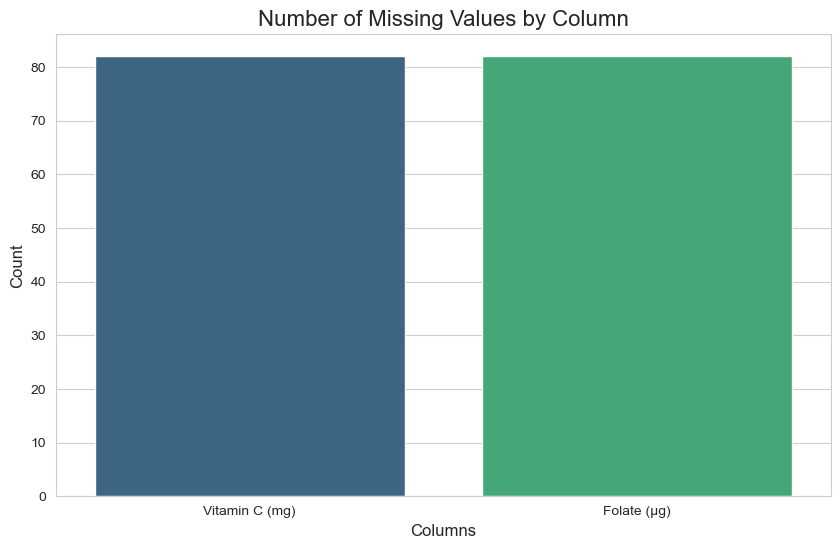

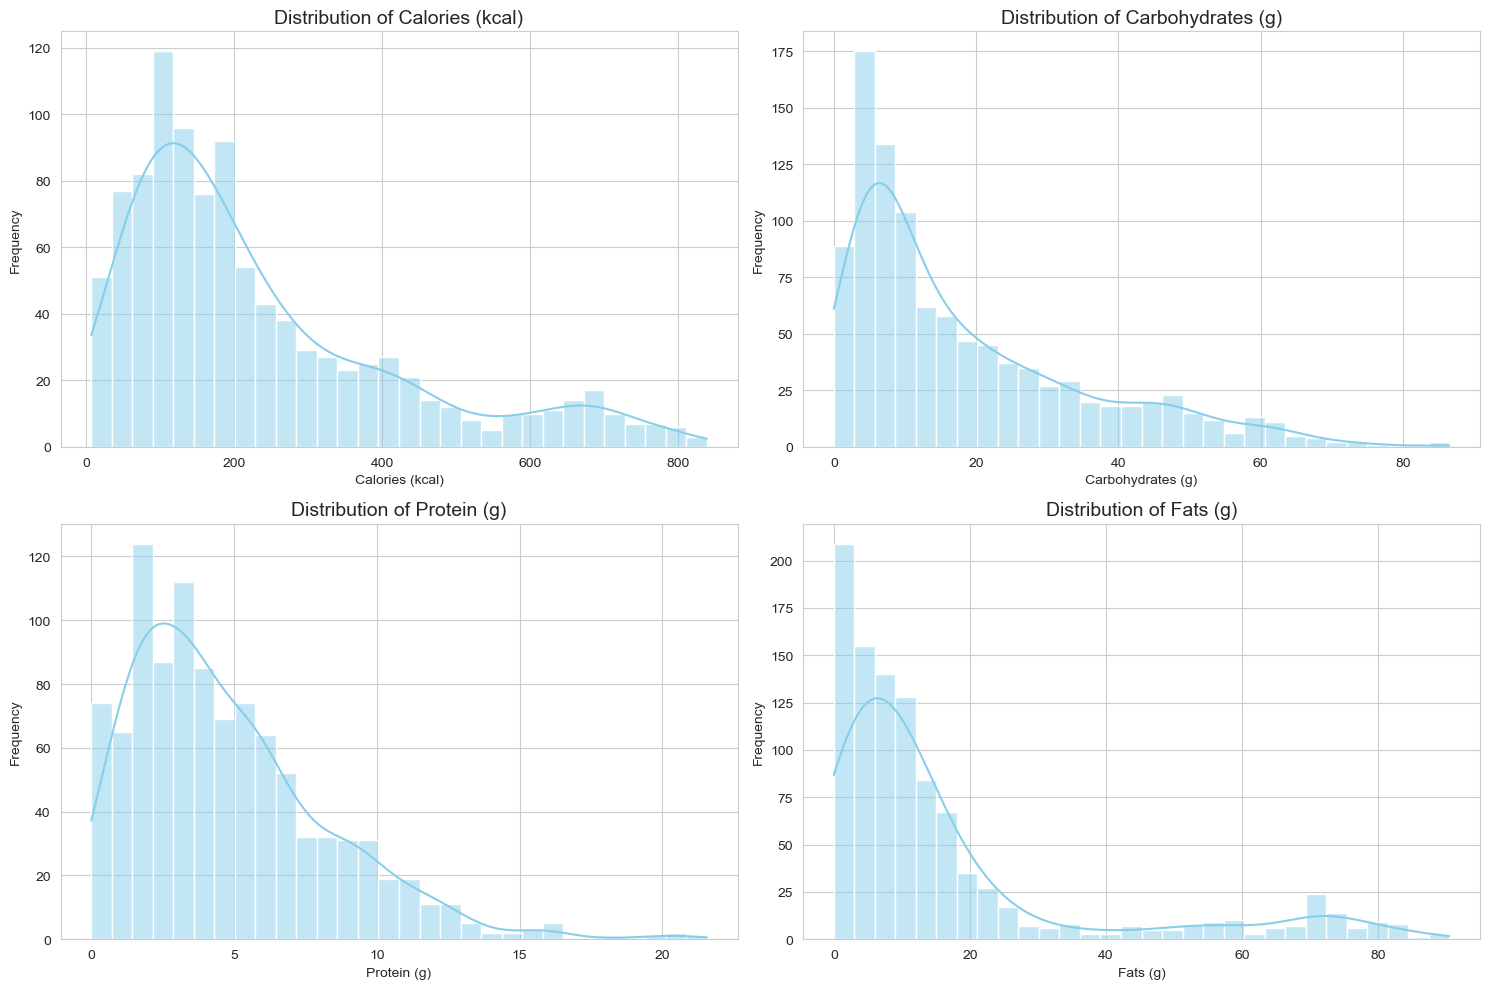

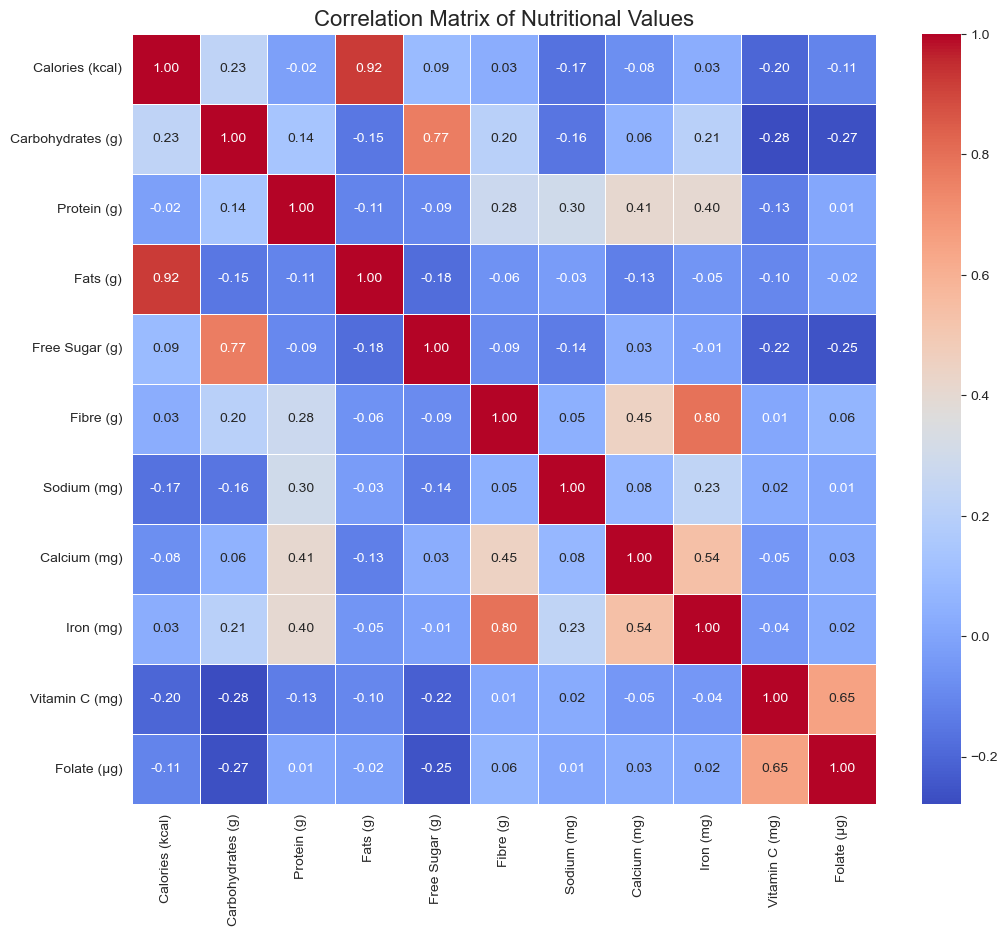

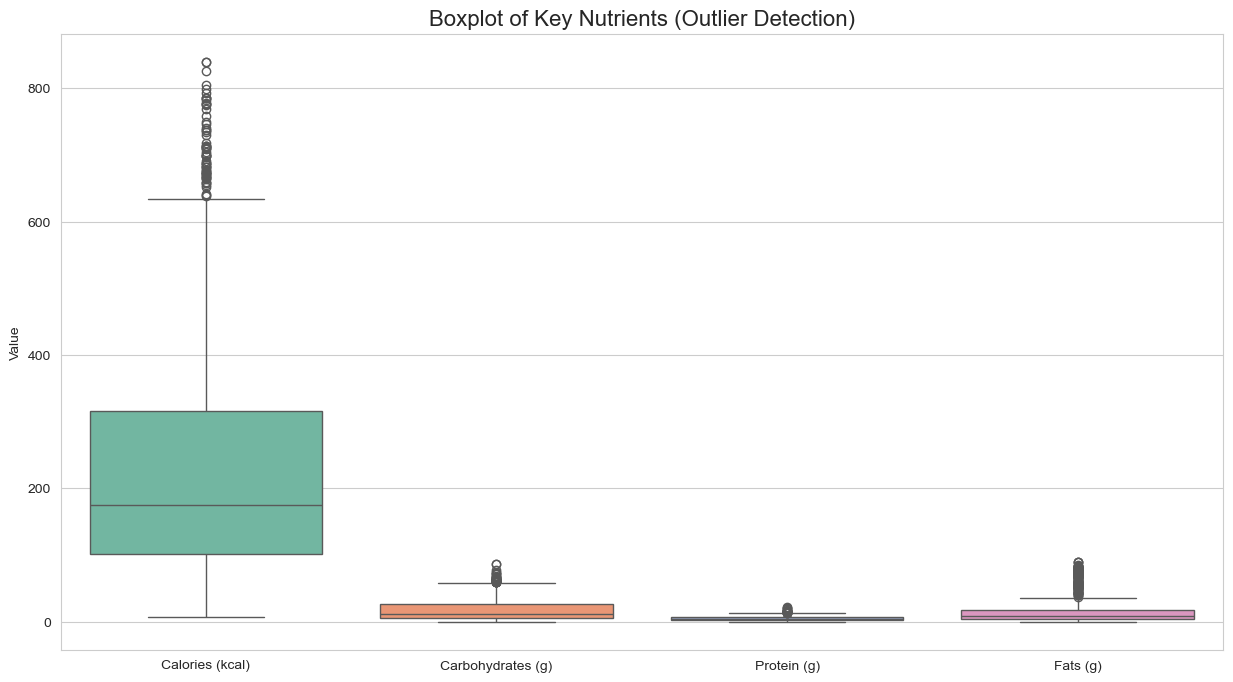

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# โหลดข้อมูล 
df = pd.read_csv('Indian_Food_Nutrition_Processed.csv')
sns.set_style("whitegrid")


# กราฟแสดงจำนวน Missing Values
plt.figure(figsize=(10, 6))
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] # เช็คคอลัมน์ที่มีค่าหายไป

if not missing_values.empty:
    sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
    plt.title('Number of Missing Values by Column', fontsize=16)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel('Columns', fontsize=12)
else:
    # ถ้าไม่มี missing value
    plt.text(0.5, 0.5, 'No Missing Values Found',
             horizontalalignment='center', verticalalignment='center', fontsize=20)
    plt.title('Missing Values Check')

plt.show()


# กราฟแสดงการกระจายตัวของสารอาหารหลัก (Histograms)
key_nutrients = ['Calories (kcal)', 'Carbohydrates (g)', 'Protein (g)', 'Fats (g)']
plt.figure(figsize=(15, 10))

for i, col in enumerate(key_nutrients, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# กราฟ Heatmap แสดง Correlation Matrix
plt.figure(figsize=(12, 10))

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Nutritional Values', fontsize=16)
plt.show()


# 4. Boxplots เพื่อดู Outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[key_nutrients], palette="Set2")
plt.title('Boxplot of Key Nutrients (Outlier Detection)', fontsize=16)
plt.ylabel('Value')
plt.show()